In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#为了在jupyter notebook里画图
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=11, releaselevel='final', serial=0)
matplotlib 3.3.3
numpy 1.19.4
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)#打印数据的description
print(housing.data.shape)#数据的大小，data相当于上一个例子中的x
print(housing.target.shape)#相当于上例中的y

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint
#pprint里的pprint函数可以使打印的格式更好
pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
#切分训练集和测试集
from sklearn.model_selection import train_test_split
#使用sklearn中的train_test_split函数切分
x_train_all, x_test, y_train_all, y_test=train_test_split(
    housing.data, housing.target, random_state = 7)
#random_state是随机种子
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all,y_train_all,random_state = 11,test_size=0.25)
#拆分训练集和验证集
#默认情况下，train_test_split会把总体数据按照三比一的比例划分
#如果需要改变，可以使用test_size参数，默认参数值为0.25
print(x_train.shape, y_train.shape)#训练集
print(x_valid.shape, y_valid.shape)#验证集
print(x_test.shape, y_test.shape)#测试集

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
#进行数据的归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()#初始化对象

x_train_scaled = scaler.fit_transform(x_train)
#选择在训练集上调用是因为需要在训练集上获得均值和方差，在
#测试集和验证集上，用与训练集上相同的均值和方差
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)
#完成数据集的归一化

In [14]:
#搭建模型
#使用keras.models.Sequential完成模型构建
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                      input_shape=x_train.shape[1:]),
    #全连接层，有30个单元，激活函数使用relu，输入shape设为
    #train shape的后半部分，1后面省略的数应该是8
    keras.layers.Dense(1),#回归模型的输出是一个数，前面还可以
    #加上任意层
])
model.summary()#打印model信息
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-5)]
#调整min_delta的值，可以改变阈值，改小更快停止，改大更慢停止
#对model进行编译，目标函数使用均方差，即其平方和的均值
#上面的loss和optimizer使用的是字符串，事实上还存在着
#字符串到真正的函数的映射，以后可以自己编写函数

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [17]:
#调用fit 函数
history = model.fit(x_train_scaled, y_train,
                   validation_data = (x_valid_scaled,y_valid),
                    epochs = 100,
                    callbacks = callbacks
                   )
#先加入训练集的数据，再加入验证集，epoch是遍历数据集的次数

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 183us/sample - loss: 0.3470 - val_loss: 0.3661
Epoch 2/100
11610/11610 [==============================] - 2s 209us/sample - loss: 0.3447 - val_loss: 0.3642
Epoch 3/100
11610/11610 [==============================] - 2s 206us/sample - loss: 0.3470 - val_loss: 0.3644
Epoch 4/100
11610/11610 [==============================] - 2s 208us/sample - loss: 0.3465 - val_loss: 0.3575
Epoch 5/100
11610/11610 [==============================] - 2s 205us/sample - loss: 0.3432 - val_loss: 0.3669
Epoch 6/100
11610/11610 [==============================] - 2s 205us/sample - loss: 0.3438 - val_loss: 0.3603
Epoch 7/100
11610/11610 [==============================] - 2s 206us/sample - loss: 0.3431 - val_loss: 0.3639
Epoch 8/100
11610/11610 [==============================] - 2s 207us/sample - loss: 0.3505 - val_loss: 0.3551
Epoch 9/100
11610/11610 [==============================] - 2s 171us/sample - lo

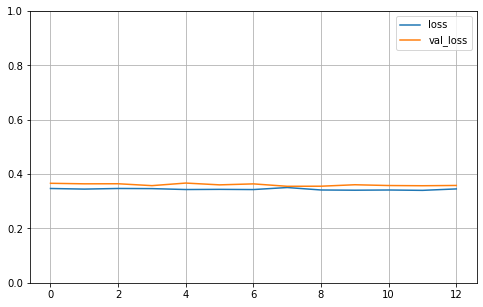

In [18]:
#打印运行结果
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)
    

In [19]:
#在测试集上运行
model.evaluate(x_test_scaled,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3579046473022579